In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('../')
import pl_datamodule 
import dataset

import matplotlib.pyplot as plt

In [2]:
root_folder="/home/aalbiol/owc/mscanData/rayosX/pollo"

In [3]:
train_dataset=("../listas_rayosX/buenos/train/train_list.txt","recortes_good")

sim_params={
    'prob_no_change':0.0,
    'min_number_of_defects':1,
    'max_number_of_defects':3,
    'alpha_low': 0.04,
    'alpha_high': 0.02,
    'min_defect_size':40,
    'max_defect_size':150,
    'min_defect_width':2,
    'max_defect_width':8,
    'defect_types':{'FlatLine': 1.0, 'CylLine': 1.0, 'FlatSpline': 1.0, 'CylSpline':1.0}
    }

In [6]:
ds=dataset.DataplacesDataSetSimulaDefectos(root_folder=root_folder,dataplaces= [train_dataset], 
                             max_values=[2**16-1,2**16-1,2**16-1],delimiter=".",terminaciones=[".png"],
                             params_simulacion_defectos=sim_params,transform=None,normalization_image_size=(700,700),logaritmo=True)

>>>>>>>>>>>> DataplacesDataset terminaciones ['.png'] delimiter .
>>>>>>>>>> scale in DataSet 1.0
Datos de normalizacion calculados y guardados en modelos/normalization.json


['/home/aalbiol/owc/mscanData/rayosX/pollo/recortes_good/LOWentremusloGood_00085.png']


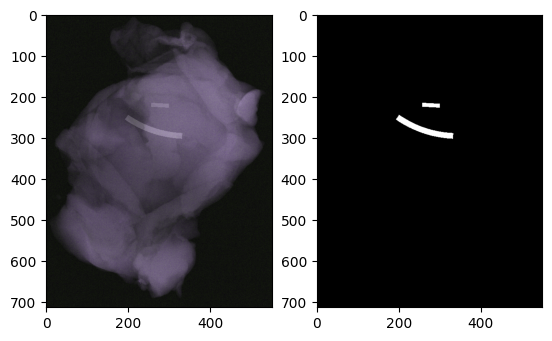

In [7]:
im,nombre,mask=ds.__getitem__(0)
print(nombre)
_=plt.subplot(1,2,1)
_=plt.imshow(im.permute((1,2,0)).numpy(),cmap="gray",clim=[0,1])
_=plt.subplot(1,2,2)
_=plt.imshow(mask.numpy(),cmap="gray",clim=[0,1])


In [29]:
datamodule=pl_datamodule.ListFileDataModule(train_dataplaces=[train_dataset], val_dataplaces=None, 
                                  images_root_path=root_folder, in_memory=False, 
                                     normalization_params=None,batch_size=4,
                                     delimiter=".",
                                     terminaciones=[".png"],
                                     max_values=[2**16-1,2**16-1,2**26-1],
                                     params_simulacion_defectos=sim_params)
dl=datamodule.train_dataloader()

self.normalization params at input of ListFileDataModule None
>>>>>>>>>>>> DataplacesDataset terminaciones ['.png'] delimiter .
>>>>>>>>>> scale in DataSet 1.0
Datos de normalizacion calculados y guardados en modelos/normalization.json
self.normalization params computed at ListFileDataModule: <class 'dict'> {'medias_norm': [0.7237963080406189, 0.7378832101821899, 0.7097190022468567], 'stds_norm': [0.18062393367290497, 0.1570129245519638, 0.20480263233184814]}
len total trainset =   110
batch_size in ListFileDataModule 4
batch_size in Dataloader train 4


In [30]:
for batch in dl:
    bb=batch
    break

In [26]:
bb.keys()

dict_keys(['images', 'casos', 'bin_masks'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.4807465e-06..0.6353831].


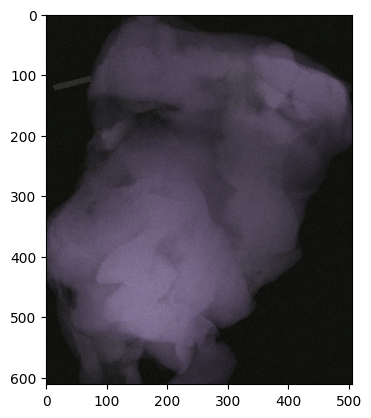

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.4807465e-06..1.185563].


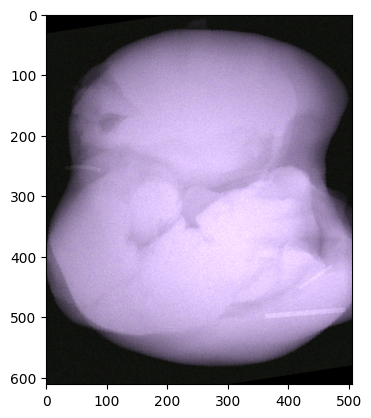

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.4807465e-06..0.9019953].


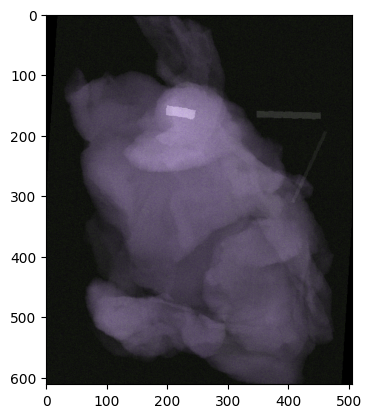

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-9.4807465e-06..0.7032537].


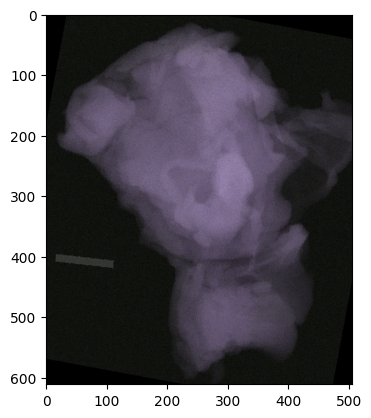

In [31]:
ims=bb["images"]

for im in ims:
    plt.imshow(im.permute((1,2,0)).numpy(),cmap="gray",clim=[0,1])
    plt.show()

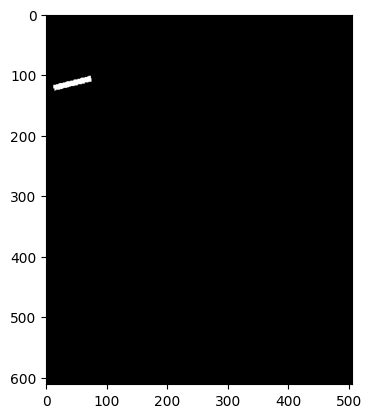

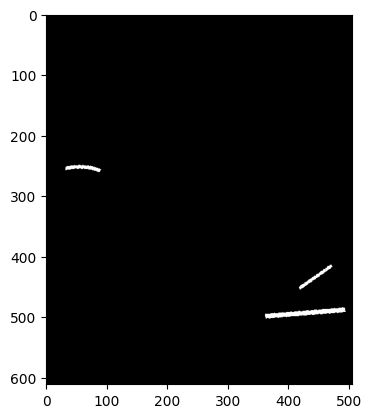

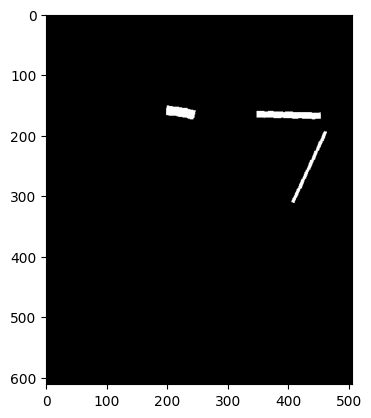

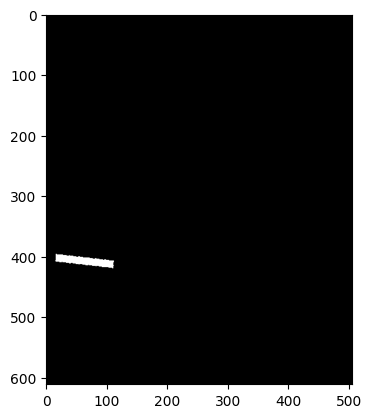

In [32]:
masks=bb["bin_masks"]

for im in masks:
    plt.imshow(im[0].numpy(),cmap="gray",clim=[0,1])
    plt.show()



In [19]:
m3=masks[3][0].numpy()

In [24]:
import numpy as np
np.sum((m3>0.0).astype(float)*(m3<0.8).astype(float))

5192.0